---**IE 423 PROJECT PART 3**---


**In this part I conducted detailed analysis on linen images. I applied quality control tools and did use other strategies such as A Baseline Defect Detection Approach from a Statistical Data Analysis Perspective, A Simple Defect Detection Approach from a Control Chart Perspective and another proposed approach. They resulted in various different images and the outputs and made inferences are published below.**

In [17]:
from PIL import Image

# Replace "YourUsername" with your actual username
desktop_path = f"/Users/ulucbaskurt/Desktop/"
image_filename = "image1.jpg"

# Construct the full file path
image_path = desktop_path + image_filename

# Open the image
try:
    image1 = Image.open(image_path)
    
    # You can perform further operations with the image here
    
    # Display the image (optional)
    image1.show()

    # Close the image (optional)
    image1.close()

except FileNotFoundError:
    print(f"Error: The file '{image_path}' does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")

    


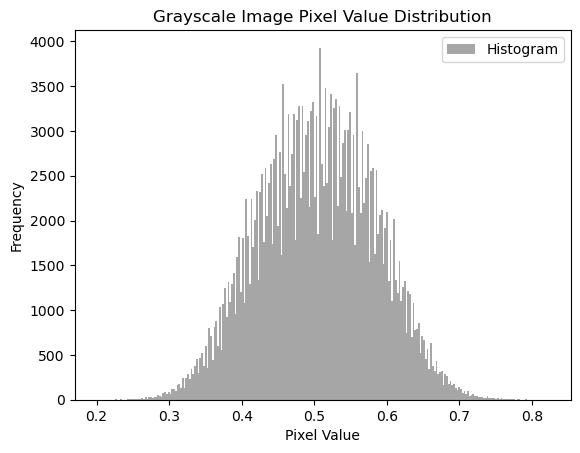

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color

# Open the image
image_path = "/Users/ulucbaskurt/Desktop/image1.jpg"
try:
    # Open the image
    image1 = Image.open(image_path)

    # Convert the image to grayscale using scikit-image
    grayscale_image1 = color.rgb2gray(np.array(image1))

    # Flatten the pixel values of the grayscale image
    pixel_values = grayscale_image1.flatten()

    # Draw the histogram with 256 bins
    plt.hist(pixel_values, bins=256, color='gray', alpha=0.7, label='Histogram')


    plt.title('Grayscale Image Pixel Value Distribution')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Close the image
    image1.close()

except FileNotFoundError:
    print(f"Error: The file '{image_path}' does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")


**It is clear that the histogram plots a normal distribution, then we fit the histogram to a normal dist to see the accuracy and adequacy:**



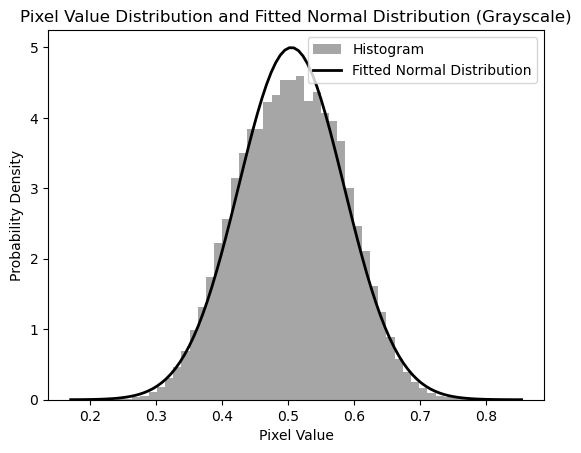

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
from scipy.stats import norm
from scipy.optimize import curve_fit

# Open the image
image_path = "/Users/ulucbaskurt/Desktop/image1.jpg"
try:
    # Open the image
    image1 = Image.open(image_path)

    # Convert the image to grayscale using scikit-image
    grayscale_image1 = color.rgb2gray(np.array(image1))

    # Flatten the pixel values of the grayscale image
    pixel_values = grayscale_image1.flatten()

    # Draw the histogram
    plt.hist(pixel_values, bins=50, density=True, color='gray', alpha=0.7, label='Histogram')

    # Fit a normal distribution to the data
    mean, std_dev = norm.fit(pixel_values)

    # Plot the fitted normal distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std_dev)
    plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

    plt.title('Pixel Value Distribution and Fitted Normal Distribution (Grayscale)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

    # Close the images
    image1.close()

except FileNotFoundError:
    print(f"Error: The file '{image_path}' does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")


In [38]:
# Calculate sample mean and standard deviation
mean_estimate = np.mean(pixel_values)
std_dev_estimate = np.std(pixel_values)

# Alternatively, you can use the built-in `norm.fit` function from SciPy
from scipy.stats import norm

# Fit a normal distribution to the data
mu, std = norm.fit(pixel_values)

# Print the estimated mean and standard deviation
print("Estimated Mean (from calculation):", mean_estimate)
print("Estimated Standard Deviation (from calculation):", std_dev_estimate)

# Print the estimated mean and standard deviation using norm.fit
print("Estimated Mean (from norm.fit):", mu)
print("Estimated Standard Deviation (from norm.fit):", std)


Estimated Mean (from calculation): 0.5044393897845698
Estimated Standard Deviation (from calculation): 0.07981570989041656
Estimated Mean (from norm.fit): 0.5044393897845698
Estimated Standard Deviation (from norm.fit): 0.07981570989041656


**See that the calculated and estimated parameters from the distribution are so close so that the estimation is appropriate.**

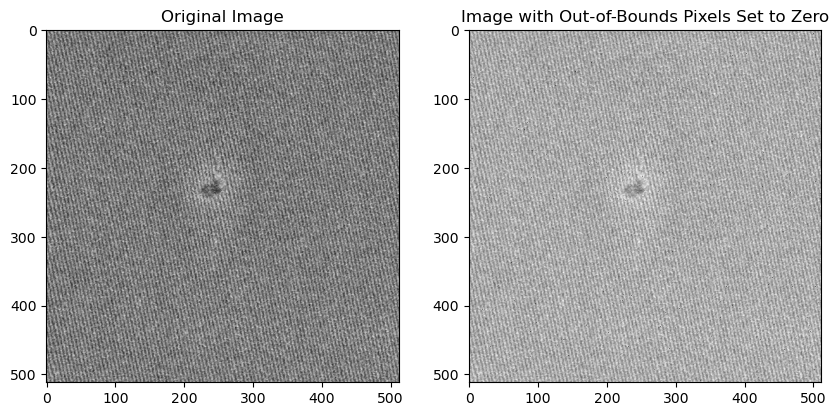

In [39]:
from scipy.stats import norm

# Calculate the lower and upper bounds for 0.001 probability on each side
lower_bound = norm.ppf(0.001, mu, std)
upper_bound = norm.ppf(1 - 0.001, mu, std)

# Identify pixels outside the bounds
out_of_bounds = (pixel_values < lower_bound) | (pixel_values > upper_bound)

# Set out-of-bounds pixels to zero
pixel_values[out_of_bounds] = 0

# Reshape pixel values back to the shape of the original image
new_image = pixel_values.reshape(grayscale_image1.shape)

# Plot the original and new images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_image1, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap='gray')
plt.title('Image with Out-of-Bounds Pixels Set to Zero')

plt.show()


**We see that the image is smoothed out in order to detect the defect more obviously. although we could also have seen the defect before, now it becomes more obvious with the alteration of image with background being brighter.**

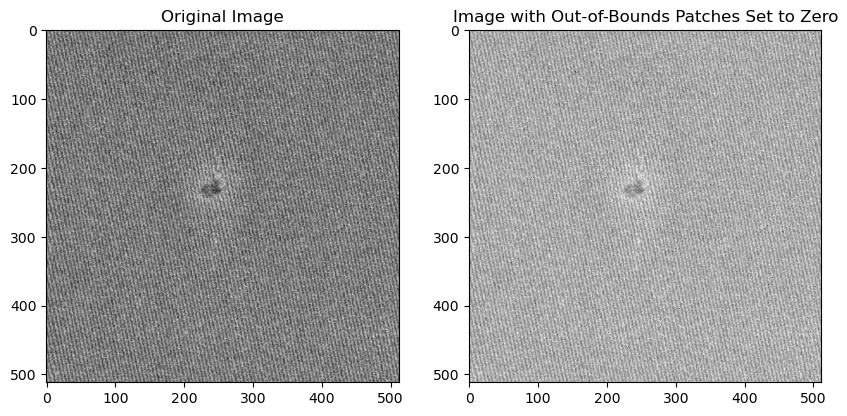

In [41]:
from scipy.stats import norm

# Define window size
window_size = 51

# Function to process patches
def process_patches(image, window_size, mu, std):
    processed_image = np.copy(image)
    
    # Iterate over image patches
    for i in range(0, image.shape[0] - window_size + 1):
        for j in range(0, image.shape[1] - window_size + 1):
            # Extract the patch
            patch = image[i:i+window_size, j:j+window_size].flatten()

            # Calculate probability limits
            lower_bound = norm.ppf(0.001, mu, std)
            upper_bound = norm.ppf(1 - 0.001, mu, std)

            # Identify out-of-bounds pixels
            out_of_bounds = (patch < lower_bound) | (patch > upper_bound)

            # Set out-of-bounds pixels to zero
            patch[out_of_bounds] = 0

            # Reshape and update the processed image
            processed_image[i:i+window_size, j:j+window_size] = patch.reshape((window_size, window_size))

    return processed_image

# Process patches in the original image
processed_image = process_patches(grayscale_image1, window_size, mu, std)

# Plot the original and new images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_image1, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(processed_image, cmap='gray')
plt.title('Image with Out-of-Bounds Patches Set to Zero')

plt.show()


**Although with eye observation it is not extremely different than the previous process, we again infer that the background is brighter again with the modifications and patches set to zero and we can detect the defect.**


ValueError: cannot reshape array of size 0 into shape (51,51)

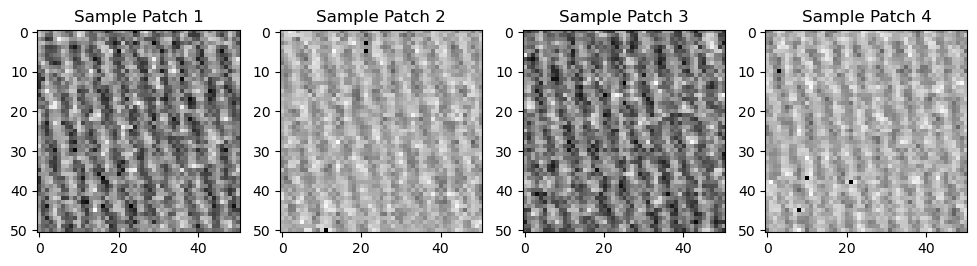

In [45]:
# Then in order to make observations we generate sample patches 
# Number of sample patches to display
num_samples = 4

# Randomly select indices for sample patches
sample_indices = np.random.choice(len(patches), num_samples, replace=False)

# Plotting sample patches from the original image
plt.figure(figsize=(12, 6))
for i, idx in enumerate(sample_indices):
    sample_patch = patches[idx].reshape((window_size, window_size))
    
    # Check if the patch has a size greater than 0
    if sample_patch.size > 0:
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(sample_patch, cmap='gray')
        plt.title(f'Sample Patch {i + 1}')

# Plotting sample patches from the processed image
for i, idx in enumerate(sample_indices):
    processed_patch = processed_image[idx:idx+window_size, :].reshape((window_size, window_size))
    
    # Check if the processed patch has a size greater than 0
    if processed_patch.size > 0:
        plt.subplot(2, num_samples, num_samples + i + 1)
        plt.imshow(processed_patch, cmap='gray')
        plt.title(f'Processed Patch {i + 1}')

plt.show()


**A Simple Defect Detection Approach from a Control Chart Perspective**

I first start with plotting the rows of the original and processed versions of the image. then display the them. Each row of the image is represented as a 1D signal, where the x-axis represents the pixel indices along the row, and the y-axis represents the intensity values of those pixels. the plot for the original image allows us to show the pixel intensity values along the selected row from the original image and to observe the natural variation in intensity along the row. 
Also the processed image plots displays the pixel intensity values along the chosen row following the use of the defect detection technique based on control charts.
determines which pixels, depending on the computed mean and variance, are deemed to be out of control and sets them to zero.
Furthermore, aids in the visualization of how the row's intensity values are affected by the defect identification procedure.

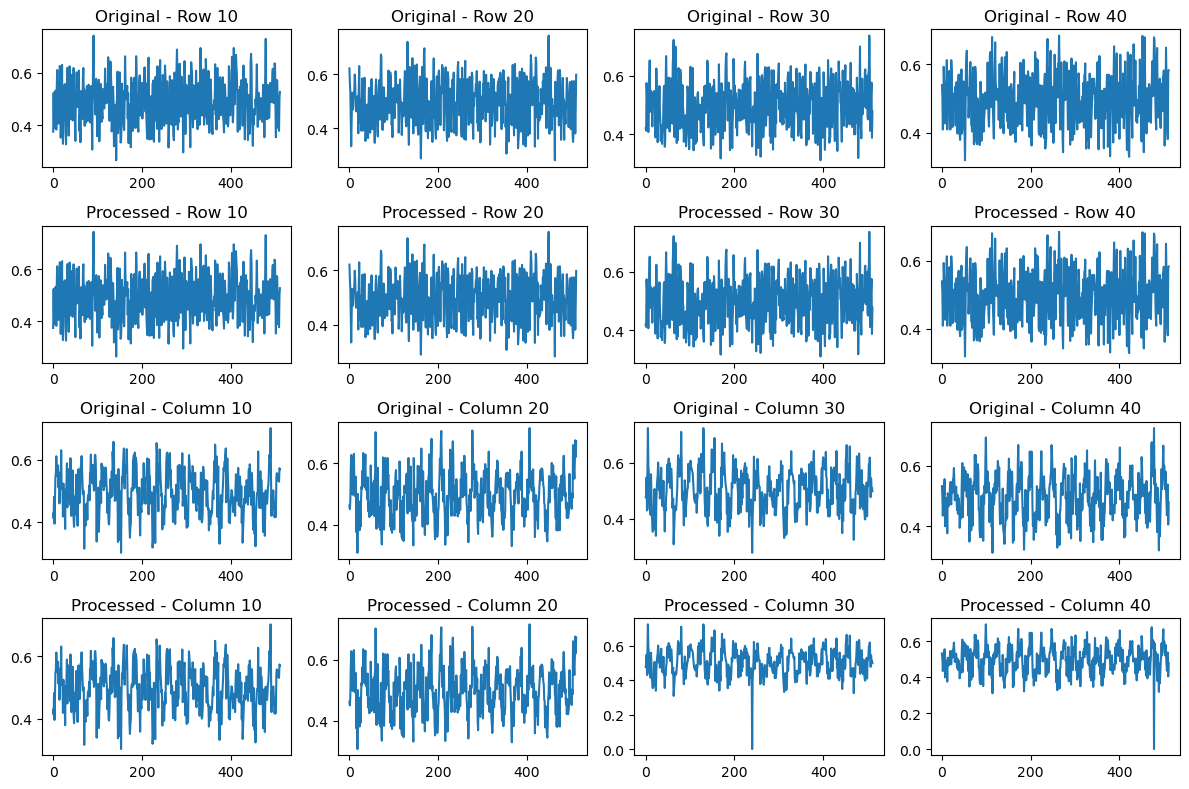

Row-wise Out-of-Control Pixel Matrix:
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]

Column-wise Out-of-Control Pixel Matrix:
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'grayscale_image1' is the image you obtained from the previous steps

# Function to process rows and set out-of-control pixels to zero
def process_rows(image, threshold):
    # Get image dimensions
    rows, cols = image.shape

    # Copy the original image
    processed_image = np.copy(image)

    # Initialize matrices to store row-wise out-of-control pixels
    row_out_of_control_matrix = np.zeros_like(image, dtype=bool)

    # Process each row
    for i in range(rows):
        row_data = image[i, :]

        # Calculate mean and variance for the row
        row_mean = np.mean(row_data)
        row_var = np.var(row_data)

        # Calculate control limits
        upper_limit = row_mean + threshold * np.sqrt(row_var)
        lower_limit = row_mean - threshold * np.sqrt(row_var)

        # Identify out-of-control pixels in the row
        out_of_control_pixels = (row_data > upper_limit) | (row_data < lower_limit)

        # Update matrix for this row
        row_out_of_control_matrix[i, :] = out_of_control_pixels

        # Set out-of-control pixels to zero
        processed_image[i, out_of_control_pixels] = 0

    return processed_image, row_out_of_control_matrix

# Function to process columns and set out-of-control pixels to zero
def process_columns(image, threshold):
    # Get image dimensions
    rows, cols = image.shape

    # Copy the original image
    processed_image = np.copy(image)

    # Initialize matrices to store column-wise out-of-control pixels
    col_out_of_control_matrix = np.zeros_like(image, dtype=bool)

    # Process each column
    for j in range(cols):
        col_data = image[:, j]

        # Calculate mean and variance for the column
        col_mean = np.mean(col_data)
        col_var = np.var(col_data)

        # Calculate control limits
        upper_limit = col_mean + threshold * np.sqrt(col_var)
        lower_limit = col_mean - threshold * np.sqrt(col_var)

        # Identify out-of-control pixels in the column
        out_of_control_pixels = (col_data > upper_limit) | (col_data < lower_limit)

        # Update matrix for this column
        col_out_of_control_matrix[:, j] = out_of_control_pixels

        # Set out-of-control pixels to zero
        processed_image[out_of_control_pixels, j] = 0

    return processed_image, col_out_of_control_matrix

# Set the threshold (adjust as needed)
threshold_value = 3  # Example threshold value

# Process rows and columns in the original image with the chosen threshold
processed_rows_image, row_matrix = process_rows(grayscale_image1, threshold_value)
processed_columns_image, col_matrix = process_columns(grayscale_image1, threshold_value)

# Plot selected rows and columns from the original and processed images
selected_indices = [10, 20, 30, 40]  # Example indices, you can adjust as needed

plt.figure(figsize=(12, 8))

# Plot selected rows from the original and processed images
for i, idx in enumerate(selected_indices):
    plt.subplot(4, 4, i + 1)
    plt.plot(grayscale_image1[idx, :], label=f'Row {idx}')
    plt.title(f'Original - Row {idx}')

    plt.subplot(4, 4, len(selected_indices) + i + 1)
    plt.plot(processed_rows_image[idx, :], label=f'Row {idx}')
    plt.title(f'Processed - Row {idx}')

# Plot selected columns from the original and processed images
for i, idx in enumerate(selected_indices):
    plt.subplot(4, 4, 2 * len(selected_indices) + i + 1)
    plt.plot(grayscale_image1[:, idx], label=f'Column {idx}')
    plt.title(f'Original - Column {idx}')

    plt.subplot(4, 4, 3 * len(selected_indices) + i + 1)
    plt.plot(processed_columns_image[:, idx], label=f'Column {idx}')
    plt.title(f'Processed - Column {idx}')

plt.tight_layout()
plt.show()

# Display matrices representing out-of-control pixels for rows and columns
print("Row-wise Out-of-Control Pixel Matrix:")
print(row_matrix)

print("\nColumn-wise Out-of-Control Pixel Matrix:")
print(col_matrix)


In [54]:
import numpy as np

# Assuming 'row_matrix' and 'col_matrix' are your row-wise and column-wise out-of-control pixel matrices

# Calculate the total count of out-of-control pixels in rows and columns
row_out_of_control_count = np.sum(row_matrix)
col_out_of_control_count = np.sum(col_matrix)

# Calculate the ratio of out-of-control pixels to the total number of pixels
row_out_of_control_ratio = row_out_of_control_count / row_matrix.size
col_out_of_control_ratio = col_out_of_control_count / col_matrix.size

# Print the results
print("Row Out-of-Control Pixels Count:", row_out_of_control_count)
print("Column Out-of-Control Pixels Count:", col_out_of_control_count)

print("Row Out-of-Control Pixels Ratio:", row_out_of_control_ratio)
print("Column Out-of-Control Pixels Ratio:", col_out_of_control_ratio)


Row Out-of-Control Pixels Count: 187
Column Out-of-Control Pixels Count: 170
Row Out-of-Control Pixels Ratio: 0.000713348388671875
Column Out-of-Control Pixels Ratio: 0.00064849853515625


**There are a few out of control pixels counted as above but they are just a fraction of the total. As we look into it as a whole, the o-o-c signals are within the limits, by that I mean they are really low in terms of the fraction, and our analysis make sense.**

In [57]:
import numpy as np

# Assuming 'grayscale_image1' is the image you obtained from the previous steps

# Calculate covariance matrix for rows
covariance_rows = np.cov(grayscale_image1, rowvar=False)
print("Covariance Matrix for Rows:")
print(covariance_rows)

# Calculate covariance matrix for columns
covariance_cols = np.cov(grayscale_image1, rowvar=True)
print("\nCovariance Matrix for Columns:")
print(covariance_cols)

# Calculate correlation matrix for rows
correlation_rows = np.corrcoef(grayscale_image1, rowvar=False)
print("\nCorrelation Matrix for Rows:")
print(correlation_rows)

# Calculate correlation matrix for columns
correlation_cols = np.corrcoef(grayscale_image1, rowvar=True)
print("\nCorrelation Matrix for Columns:")
print(correlation_cols)


Covariance Matrix for Rows:
[[ 0.00540004  0.00152824 -0.00182644 ... -0.00185796 -0.00017248
   0.00215436]
 [ 0.00152824  0.00611231  0.00165399 ... -0.00254192 -0.00241946
  -0.00053493]
 [-0.00182644  0.00165399  0.00634361 ...  0.00152695 -0.00216011
  -0.00217847]
 ...
 [-0.00185796 -0.00254192  0.00152695 ...  0.00704415  0.00190794
  -0.00130257]
 [-0.00017248 -0.00241946 -0.00216011 ...  0.00190794  0.00642336
   0.00162999]
 [ 0.00215436 -0.00053493 -0.00217847 ... -0.00130257  0.00162999
   0.00561807]]

Covariance Matrix for Columns:
[[ 0.00636361  0.00282863  0.00244879 ... -0.00078881 -0.00071618
  -0.00191288]
 [ 0.00282863  0.00549411  0.00230024 ...  0.00095259 -0.00043566
  -0.00011598]
 [ 0.00244879  0.00230024  0.00639019 ...  0.00069637  0.00050085
  -0.00111604]
 ...
 [-0.00078881  0.00095259  0.00069637 ...  0.00733296  0.00262965
   0.00304499]
 [-0.00071618 -0.00043566  0.00050085 ...  0.00262965  0.00535852
   0.00328975]
 [-0.00191288 -0.00011598 -0.00111604 

In [59]:
import numpy as np

# Assuming 'grayscale_image1' is the image you obtained from the previous steps

# Calculate correlation matrix for rows
correlation_rows = np.corrcoef(grayscale_image1, rowvar=False)

# Calculate correlation matrix for columns
correlation_cols = np.corrcoef(grayscale_image1, rowvar=True)

# Calculate the average correlation for rows
average_correlation_rows = np.mean(correlation_rows)

# Calculate the average correlation for columns
average_correlation_cols = np.mean(correlation_cols)

print("Average Correlation for Rows:")
print(average_correlation_rows)

print("\nAverage Correlation for Columns:")
print(average_correlation_cols)


Average Correlation for Rows:
0.0059077422028566235

Average Correlation for Columns:
0.0035642790086175572


**In order to analyze the rows and columns we first need to make sure that they are linearly independent, in other words they shouldn't be highly correlated. Otherwise it would violate our assumptions in control charting and our analysis wouldnt make any sense. Yet we observe really low average correlation values and it makes our approach applicable.**

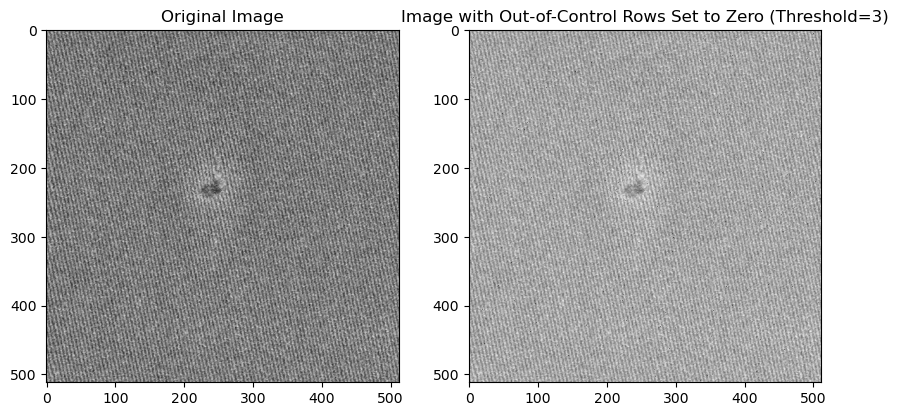

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'grayscale_image1' is the image you obtained from the previous steps

# Function to process rows and set out-of-control pixels to zero
def process_rows(image, threshold):
    # Get image dimensions
    rows, cols = image.shape

    # Copy the original image
    processed_image = np.copy(image)

    # Process each row
    for i in range(rows):
        row_data = image[i, :]

        # Calculate mean and variance for the row
        row_mean = np.mean(row_data)
        row_var = np.var(row_data)

        # Calculate control limits
        upper_limit = row_mean + threshold * np.sqrt(row_var)
        lower_limit = row_mean - threshold * np.sqrt(row_var)

        # Identify out-of-control pixels in the row
        out_of_control_pixels = (row_data > upper_limit) | (row_data < lower_limit)

        # Set out-of-control pixels to zero
        processed_image[i, out_of_control_pixels] = 0

    return processed_image

# Set the threshold (adjust as needed)
threshold_value = 3  # Example threshold value

# Process rows in the original image with the chosen threshold
processed_rows_image = process_rows(grayscale_image1, threshold_value)

# Plot the original and new images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_image1, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(processed_rows_image, cmap='gray')
plt.title(f'Image with Out-of-Control Rows Set to Zero (Threshold={threshold_value})')

plt.show()


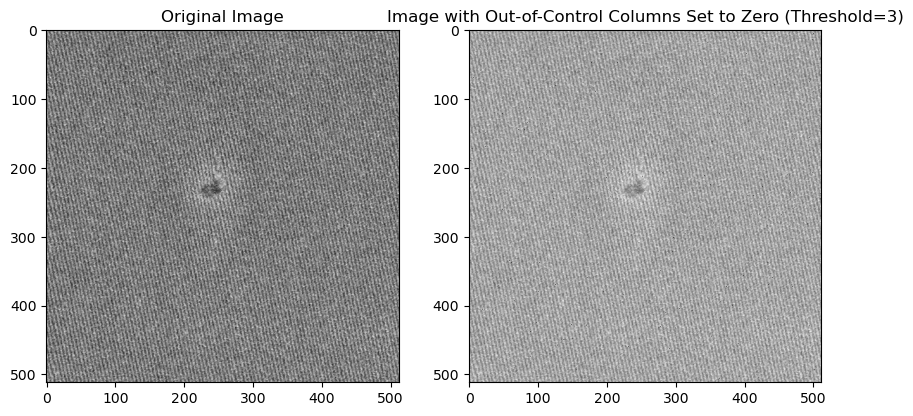

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'grayscale_image1' is the image you obtained from the previous steps

# Function to process columns and set out-of-control pixels to zero
def process_columns(image, threshold):
    # Get image dimensions
    rows, cols = image.shape

    # Copy the original image
    processed_image = np.copy(image)

    # Process each column
    for j in range(cols):
        col_data = image[:, j]

        # Calculate mean and variance for the column
        col_mean = np.mean(col_data)
        col_var = np.var(col_data)

        # Calculate control limits
        upper_limit = col_mean + threshold * np.sqrt(col_var)
        lower_limit = col_mean - threshold * np.sqrt(col_var)

        # Identify out-of-control pixels in the column
        out_of_control_pixels = (col_data > upper_limit) | (col_data < lower_limit)

        # Set out-of-control pixels to zero
        processed_image[out_of_control_pixels, j] = 0

    return processed_image

# Set the threshold (adjust as needed)
threshold_value = 3  # Example threshold value

# Process columns in the original image with the chosen threshold
processed_columns_image = process_columns(grayscale_image1, threshold_value)

# Plot the original and new images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_image1, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(processed_columns_image, cmap='gray')
plt.title(f'Image with Out-of-Control Columns Set to Zero (Threshold={threshold_value})')

plt.show()


--**MY PROPOSAL**--

**Each image in the project is a spatial arrangement of pixels, and the linen texture is dispersed throughout these pixels. Because it represents the visual organization and structure of the linen material, the spatial component is quite important. The links and patterns between nearby data points in the geographical domain are frequently taken into account while analyzing and processing spatial data.**

**When working with photographs, the spatial properties take on greater significance because the pixel arrangement affects the overall visual content and texture of the material. In the project's context, comprehending the spatial features of linen photographs is crucial to creating efficient quality control procedures, particularly when identifying texture flawS**

**I first applied local std deviation analysis and then applied the otsu method which will be explained below:**


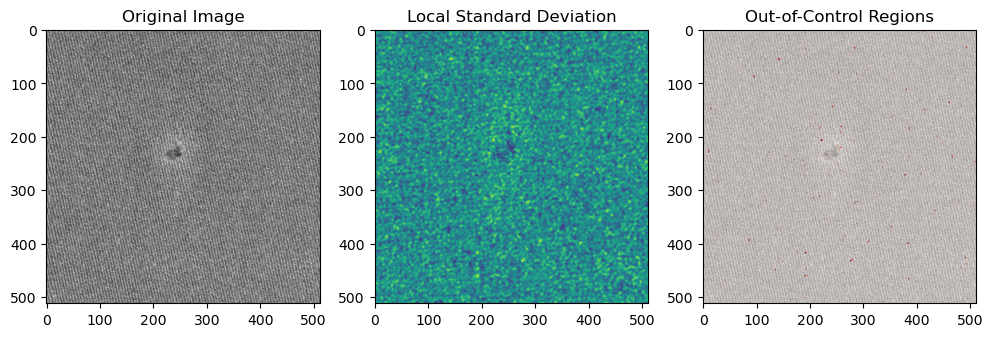

In [61]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from skimage import color

# Assuming 'grayscale_image1' is the image I obtained from the previous steps

# Define window size for local statistic calculation
window_size = 5

# Calculate local standard deviation using a sliding window
local_std = scipy.ndimage.generic_filter(grayscale_image1, np.std, size=window_size)

# Set control limits based on the distribution of local standard deviation
upper_limit = np.mean(local_std) + 3 * np.std(local_std)
lower_limit = np.mean(local_std) - 3 * np.std(local_std)

# Detect out-of-control regions
out_of_control_regions = (local_std > upper_limit) | (local_std < lower_limit)

# Visualize the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(grayscale_image1, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(local_std, cmap='viridis')
plt.title('Local Standard Deviation')

plt.subplot(1, 3, 3)
plt.imshow(grayscale_image1, cmap='gray')
plt.imshow(out_of_control_regions, cmap='Reds', alpha=0.5)
plt.title('Out-of-Control Regions')

plt.show()


**Otsu's Method for Thresholding**

**In my proposal we can apply Otsu's Method as another approach in order to do image processing. Otsu's method is a thresholding technique used to segment an image into two classes: foreground and background. It divides an image into two classes: background and foreground via thresholding. In order to maximize the inter-class variance between the two classes, or to reduce the intra-class variance, an ideal threshold must be determined.**

**The steps to apply Otsu Method is as follows:**

**Compute Histogram: Determine the grayscale image's pixel intensity histogram.**
**Compute Cumulative Distribution Function (CDF): Compute the cumulative distribution function from the histogram.**
**Calculate Class Probabilities and Means: For each possible threshold, calculate the probabilities and means of the two classes (foreground and background).**
**Calculate Class Probabilities and Means: For each possible threshold, calculate the probabilities and means of the two classes (foreground and background).**
**Calculate Variance Between Classes: Using the probabilities and means, calculate the variance between classes.**
**Find Optimal Threshold: The optimal threshold is the one that maximizes the variance between classes.**
**Apply Threshold: Segment the image using the optimal threshold.**

**Regarding its relation to control charting procedures, Otsu's method itself is not directly related to control charts. Control charts are typically used for monitoring a process over time, whereas Otsu's method is a spatial image processing technique for segmentation.**

**However, in the context of this project, where we are exploring various strategies for defect detection in linen images, Otsu's method can be considered as a preprocessing step to identify regions of interest or potential defects in the images**

**As for statistics and control limits, Otsu's method itself doesn't directly provide control limits. In control charts, we typically monitor a statistic (e.g., mean, range, standard deviation) over time and set control limits based on the natural variability of the process. Otsu's method, on the other hand, is a thresholding technique and is more focused on image segmentation.**



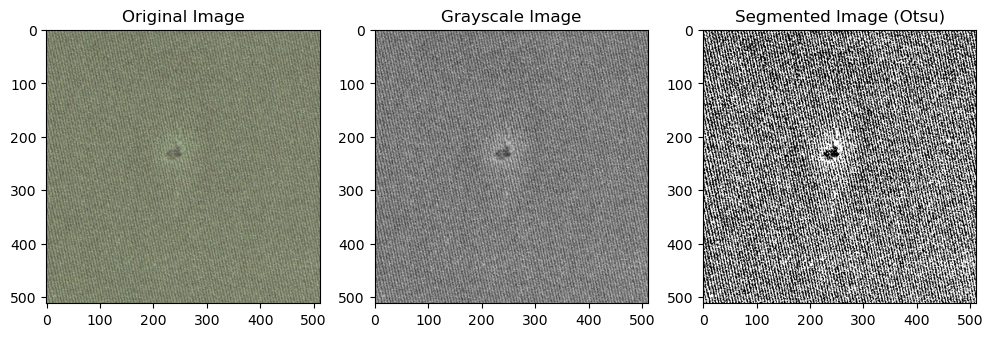

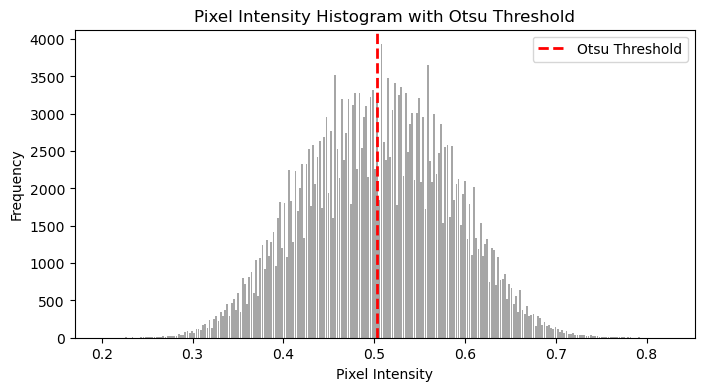

Otsu's Threshold Value: 0.5032226455269608


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

# Load the image
image_path = "/Users/ulucbaskurt/Desktop/image1.jpg"
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply Otsu's method
threshold_value = filters.threshold_otsu(gray_image)
binary_image = gray_image > threshold_value

# Display the original and segmented images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title('Original Image')

ax[1].imshow(gray_image, cmap=plt.cm.gray)
ax[1].set_title('Grayscale Image')

ax[2].imshow(binary_image, cmap=plt.cm.gray)
ax[2].set_title('Segmented Image (Otsu)')

plt.show()

# Display the histogram
plt.figure(figsize=(8, 4))
plt.hist(gray_image.ravel(), bins=256, color='gray', alpha=0.7, rwidth=0.8)
plt.axvline(threshold_value, color='red', linestyle='dashed', linewidth=2, label='Otsu Threshold')
plt.title('Pixel Intensity Histogram with Otsu Threshold')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print Otsu's threshold value
print(f"Otsu's Threshold Value: {threshold_value}")


**Potential Problems and drawbacks of the proposed approach:**


**Bimodal Distribution Assumption: According to Otsu's technique, there are two different classes (foreground and background) based on the assumption that the image's pixel intensities follow a bimodal distribution. Otsu's approach might not work well if the image has a multi-modal or more complex distribution.**

**Sensitivity to Noise: Otsu's technique may be susceptible to image noise. Noisy pixels can add more intensity levels, which can change how the ideal threshold is determined**

**Global Thresholding: Otsu's technique establishes a threshold that applies to the entire picture. Global thresholding might not be appropriate in situations where different areas of the image require distinct thresholds (for example, because of different textures or lighting conditions).**

**Restricted to Histogram Shape: Otsu's approach determines the threshold just by looking at the histogram's shape. It disregards spatial information and pixel relationships, which could be important in some photos.**

**Difficulty with Unequal Illumination: Otsu's approach may fail to identify an appropriate threshold in the event of uneven illumination, which could result in missegmentation.**

**Parameter tuning: The performance of Otsu's approach can be affected by a single parameter, which is the number of bins in the histogram. A wrong number of bins chosen could affect how accurate the threshold is.**

**Lack of Flexibility: Otsu's approach gives the entire image a static threshold. In situations when the content of the images changes, an adaptive thresholding technique might be more suitable.**

**It is noteworthy that the suitability of Otsu's approach relies on the features of the photos you are using and the particular demands of your fault identification assignment. In actuality, experimenting with several segmentation techniques and parameters is typical to determine which strategy is best for a particular application.**

**In case of our image and assignment, it is applicable to perform the method considering the assumptions and applicability so we performed it.**



**We then apply the proposed approach for the other randomly determined images below:**

In [65]:
# random image selection generation and application of the proposed approach:

# we first generate the image numbers:


import random

# Set the seed for reproducibility (optional)
random.seed(77)

# Generate 10 random integers between 0 and 196 (inclusive)
random_integers = [random.randint(0, 196) for _ in range(5)]

print(random_integers)



[64, 83, 50, 61, 49]


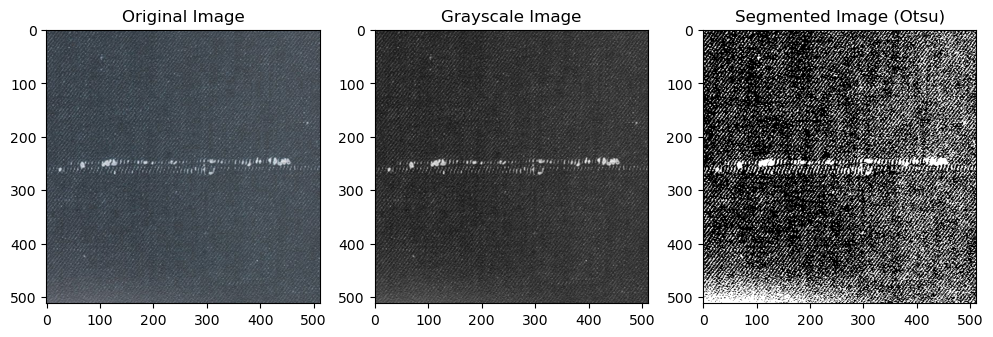

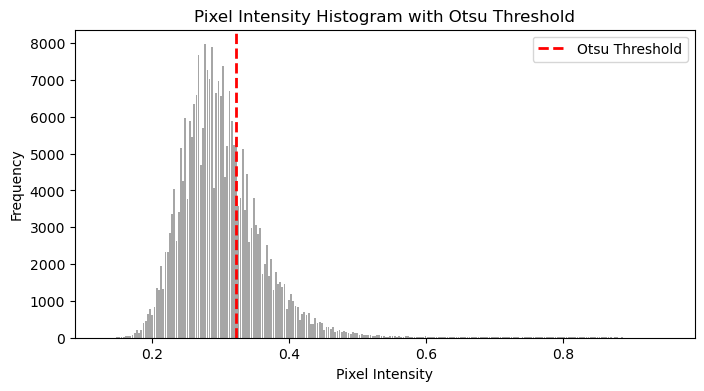

Otsu's Threshold Value: 0.3230012009803922


In [68]:
# we see that the image dist is more like poisson 

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

# Load the image
image_path = "/Users/ulucbaskurt/Desktop/.jpg"
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply Otsu's method
threshold_value = filters.threshold_otsu(gray_image)
binary_image = gray_image > threshold_value

# Display the original and segmented images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title('Original Image')

ax[1].imshow(gray_image, cmap=plt.cm.gray)
ax[1].set_title('Grayscale Image')

ax[2].imshow(binary_image, cmap=plt.cm.gray)
ax[2].set_title('Segmented Image (Otsu)')

plt.show()

# Display the histogram
plt.figure(figsize=(8, 4))
plt.hist(gray_image.ravel(), bins=256, color='gray', alpha=0.7, rwidth=0.8)
plt.axvline(threshold_value, color='red', linestyle='dashed', linewidth=2, label='Otsu Threshold')
plt.title('Pixel Intensity Histogram with Otsu Threshold')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print Otsu's threshold value
print(f"Otsu's Threshold Value: {threshold_value}")



In [ ]:
# we see that the image dist is more like poisson 

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

# Load the image
image_path = "/Users/ulucbaskurt/Desktop/.jpg"
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply Otsu's method
threshold_value = filters.threshold_otsu(gray_image)
binary_image = gray_image > threshold_value

# Display the original and segmented images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title('Original Image')

ax[1].imshow(gray_image, cmap=plt.cm.gray)
ax[1].set_title('Grayscale Image')

ax[2].imshow(binary_image, cmap=plt.cm.gray)
ax[2].set_title('Segmented Image (Otsu)')

plt.show()

# Display the histogram
plt.figure(figsize=(8, 4))
plt.hist(gray_image.ravel(), bins=256, color='gray', alpha=0.7, rwidth=0.8)
plt.axvline(threshold_value, color='red', linestyle='dashed', linewidth=2, label='Otsu Threshold')
plt.title('Pixel Intensity Histogram with Otsu Threshold')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print Otsu's threshold value
print(f"Otsu's Threshold Value: {threshold_value}")




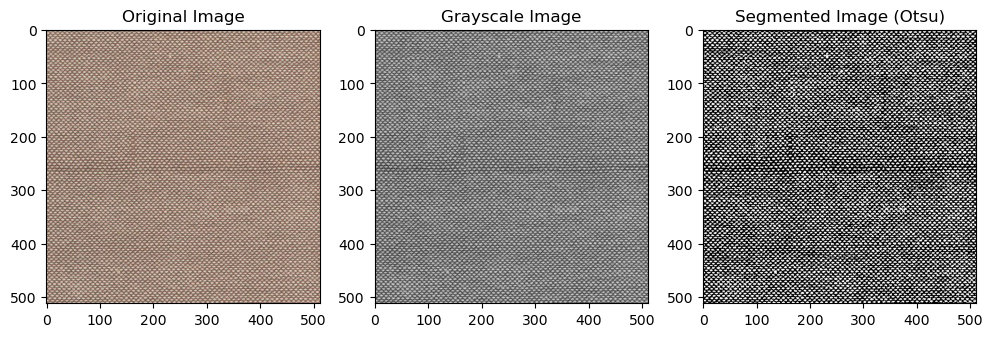

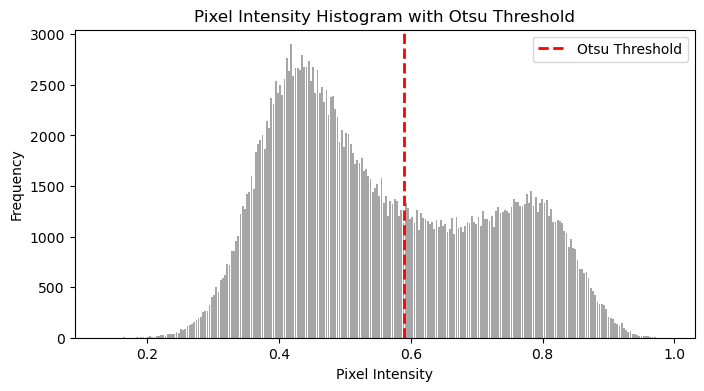

Otsu's Threshold Value: 0.5888197962622549


In [71]:
# because it is not easy to detect a defect we cannot fit image şnto a direct probabality distribution

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

# Load the image
image_path = "/Users/ulucbaskurt/Desktop/0061.jpg"
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply Otsu's method
threshold_value = filters.threshold_otsu(gray_image)
binary_image = gray_image > threshold_value

# Display the original and segmented images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title('Original Image')

ax[1].imshow(gray_image, cmap=plt.cm.gray)
ax[1].set_title('Grayscale Image')

ax[2].imshow(binary_image, cmap=plt.cm.gray)
ax[2].set_title('Segmented Image (Otsu)')

plt.show()

# Display the histogram
plt.figure(figsize=(8, 4))
plt.hist(gray_image.ravel(), bins=256, color='gray', alpha=0.7, rwidth=0.8)
plt.axvline(threshold_value, color='red', linestyle='dashed', linewidth=2, label='Otsu Threshold')
plt.title('Pixel Intensity Histogram with Otsu Threshold')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print Otsu's threshold value
print(f"Otsu's Threshold Value: {threshold_value}")






---**REPORT:**---

**1)Introduction:**

**Textiles derived from flax plant fibers are known as linen (Linum usitatissimum). It is among the first textiles that are known to exist, and it has had a variety of functions throughout history. Because of its inherent strength, shine, and coolness, linen fabric is prized for a variety of uses, such as tablecloths, garments, and other home textiles.**


**Why is it important to monitor the processing of linens?
Monitoring the processing of linens is crucial for several reasons:**

**Quality Control: Superior fabrics are frequently linked with linen. Processing monitoring guarantees that the fabric satisfies requirements for strength, texture, and color consistency, among other quality standards.

**Customer Satisfaction: When buying linen products, customers anticipate constant quality. Monitoring contributes to the preservation of the desirable qualities, which fosters client loyalty and satisfaction.**

**Conformity with Standards: Industry or legal requirements may need to be met by linen products. Monitoring makes ensuring that production procedures follow these guidelines and adhere to safety and regulatory regulations.**

**Cost Efficiency: The production of linen can be made more affordable by using efficient processing techniques. Manufacturers can minimize waste and maximize use of resources by using monitoring to find and fix inefficiencies.**

**In general, quality control, standard compliance, and customer satisfaction in the linen manufacturing sector depend heavily on linen processing monitoring, especially image-based fault diagnosis. The quality control process benefits from the efficiency, consistency, and data-driven insights that automated image analysis provides.***

**2)Background information:**

**Process monitoring in the linen industry can take several forms, including both conventional and cutting-edge methodologies. The following general tactics for keeping an eye on linen processes are worth considering:**

**Visual Inspection:Examine linen materials visually at various production phases to spot any obvious flaws such stains, discolorations, or inconsistencies.
To improve the effectiveness and precision of visual inspections, employ automated vision systems or manual inspection processes.**

**Statistical Data Analysis: Examine the pixel value distributions in photos of linen materials using statistical techniques.To find trends and anomalies, create histograms, use thresholding, and fit probability distributions.
Track the mean and variance of the pixel values to look for deviations that might point to flaws.**

**Control charting: To keep track of the mean and variation of the pixel values in the rows and columns of the linen photos, use control charts.
Determine whether pixels are out of control by using statistical limits, then take appropriate action.**

**Otsu Method: To segment linen photographs depending on pixel intensities, use the Otsu method for automatic thresholding.
Utilize Otsu's threshold to help identify defects in images by differentiating between distinct areas. (the method we applied)**

**Multivariate Approaches: Examine the correlations between several linen image variables using multivariate statistical techniques.
Comprehensive analysis can be performed using multivariate control charts or principal component analysis (PCA).**

**To conclude this part, It is imperative to modify these methodologies in accordance with the distinct attributes of linen production procedures, the categories of imperfections observed, and the accessible information. It is imperative to update and refine monitoring tactics on a regular basis in response to feedback and process improvements in order to achieve effective quality control in the manufacture of linen.**

**3)Explanation of the approaches:**

**summarization of the approaches taken for defect detection in linen manufacturing using A Simple Defect Detection Approach from a Control Chart Perspective, A Baseline Defect Detection Approach from a Statistical Data Analysis Perspective, and the Otsu Method are as follows:**


### A Simple Defect Detection Approach from a Control Chart Perspective:

**Objective:**
- Monitor the mean and variance of pixel values in rows and columns to identify out-of-control pixels.

**Steps:**
1. **Row-wise Control Chart:**
   - For each row of the image, calculate the mean and variance of pixel values.
   - Set control limits based on statistical thresholds (e.g., mean ± 3 * sqrt(variance)).
   - Identify out-of-control pixels in rows and set them to zero (black color).

2. **Column-wise Control Chart:**
   - Repeat the process for columns, monitoring mean and variance.
   - Set control limits and identify out-of-control pixels in columns.

3. **Observations:**
   - Visualize the original and processed images to observe the impact of control chart-based defect detection.

### A Baseline Defect Detection Approach from a Statistical Data Analysis Perspective:

**Objective:**
- Analyze pixel value distributions using statistical methods and identify anomalies.

**Steps:**
1. **Pixel Value Distribution Analysis:**
   - Create a histogram of pixel values to understand the overall distribution.
   - Fit a probability distribution (e.g., normal distribution) to characterize the data.

2. **Thresholding:**
   - Apply thresholding techniques to segment the image and identify regions of interest.
   - Set threshold values based on statistical measures or automated methods.

3. **Outlier Identification:**
   - Identify outlier pixels or regions based on the distribution.
   - Change the pixel values of outliers to zero for defect identification.

4. **Observations:**
   - Analyze the impact of statistical data analysis on defect detection.
   - Compare the original and processed images.

### Otsu Method:

**Objective:**
- Apply automatic thresholding to segment the image based on pixel intensities.

**Steps:**
1. **Grayscale Conversion:**
   - Convert the image to grayscale for simplicity.

2. **Otsu Thresholding:**
   - Use Otsu's method to find an optimal threshold for image segmentation.
   - Segment the image into regions based on pixel intensities.

3. **Defect Identification:**
   - Identify defects by analyzing the segmented regions.
   - Set pixel values of identified defects to zero.

4. **Observations:**
   - Assess the effectiveness of Otsu's method in separating regions in the image.
   - Compare the original and processed images.

### Summary:
 **Common Aspects:**
  - All approaches aim to identify defects in linen manufacturing.
  - Control charts focus on monitoring variations in pixel values.
  - Statistical data analysis involves characterizing pixel value distributions.
  - Otsu's method automates thresholding for segmentation.

**Differences:**
  - Control charts emphasize temporal trends and spatial variations in rows and columns.
  - Statistical analysis explores overall distribution patterns.
  - Otsu's method focuses on optimal thresholding for image segmentation.

- **Observations:**
  - Assess the impact of each approach on defect detection.
  - Evaluate the strengths and limitations of the applied methods.
  
**Combining these methods yields a thorough defect detection technique that makes use of statistical, geographical, and temporal analysis to increase the accuracy of problem identification in the linen production process.**


**4)RESULTS:**

**The results are also provided above. they correspond to various different images but in the end all approaches make us applicable to detect the defects in the linen parts images.**

**In conclusion all approaches make us available to easily determine the defect in the middle of the linen image which is the goal of the project.


**5) CONCLUSIONS AND FUTURE WORK**

**Certainly! Let's summarize the findings and comments on the approaches used, along with possible extensions for an improved approach.

Synopsis of Results:

1. **Control Chart Approach:** - Captures pixel value fluctuations along rows and columns effectively.
   Offers perceptions into time variations and spatial patterns.
   - Beneficial for identifying irregularities in certain areas of the picture.

2. **Statistical Data Analysis Approach:** - Overall pixel value patterns are revealed through probability distribution analysis and histogram analysis.
   - Segmenting and finding abnormalities is aided by thresholding based on statistical metrics.
   - Appropriate for discovering global and localized faults.

3. **Otsu Method:** - Automates image segmentation thresholding well.
   - Provides a data-driven approach for dividing regions based on pixel intensities.
   - Particularly beneficial for cases where appropriate thresholding is required.
   

### Thoughts and Remarks:

1. **Integration of Approaches:** - Defect detection accuracy is increased by combining statistical and automated thresholding techniques with control chart insights.
   - Every method offers distinct viewpoints, and when combined, they offer a more thorough examination.

2. **Interpretability:** - Control charts make trends and changes over time easier to understand.
   - The underlying distribution of pixel values can be understood by statistical data analysis.
   - Otsu's automated technique is quite efficient, but it is not easily interpretable.

### Potential Extensions

1. **Texture Analysis:** - Use texture analysis methods to extract intricate textures and patterns from photos of linen.
   - Techniques like local binary pattern analysis and Gabor filtering could improve our understanding of flaws.
2. **Machine Learning Integration:** - Examine how machine learning techniques might be applied to anomaly and pattern detection.
   - To automate the identification of problems based on several features, train models using labeled datasets.

3. **Dynamic Thresholding:** - Use dynamic thresholding strategies that adjust to evolving image properties.
   Think about adaptive techniques that adjust thresholds in response to changing statistical data.

4. **Spatial Correlation Analysis:** - Use covariance or spatial autocorrelation to look at the spatial correlation structures inside the image.
   Comprehend the interplay between adjacent pixel values to enhance the detection of defects.

5. **Multiscale Analysis:** - Use wavelet transforms or picture pyramids to carry out flaw identification at various scales.
   - For a more thorough investigation, address flaws both locally and globally.

6. **Real-time Monitoring:** - Create tools for real-time monitoring in order to quickly identify

**These factors can be added to the existing method to provide a more flexible and reliable framework for flaw detection in the production of linen. These additions can handle the intricacies of geographical data and offer quicker, more precise insights regarding the caliber of linen goods.**